In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sb
%matplotlib inline

In [262]:
# matplotlib settings
settings = {'text.usetex': True,
        'font.weight' : 'bold',
        'font.size'   : 18}

plt.rcParams.update(**settings)

In [263]:
fuel_to_color = {
    "biomass": "forestgreen",
    "hard coal": "dimgray",
    "hydro": "mediumblue",
    "lignite": "saddlebrown",
    "gas": "lightskyblue",
    "uran": "darkorange",
    "oil": "darkviolet",
    "waste": "lime",
    "wind": "cyan",
    "sun": "yellow"
}

period_to_file_extension = {
    "winter": "1_winter_",
    "summer": "2_summer_"
}

model_type_to_description = {
    "dispatch_nuclear": "Dispatch with nuclear plants",
    "dispatch": "Dispatch without nuclear plants",
    "dc_load_flow_nuclear": "DC load flow with nulear plants",
    "dc_load_flow": "DC load flow without nulear plants"
}

time_periods = ["winter", "summer"]

In [264]:
def plot_energybalance_single(model_type, time_period):
    path = "export_files/" + model_type + "/"

    generation_by_fuel = pd.read_csv(path + period_to_file_extension[time_period] + "generation_by_fuel.csv")
    consumption = pd.read_csv(path + period_to_file_extension[time_period] + "consumption.csv")
    price = pd.read_csv(path + period_to_file_extension[time_period] + "price.csv")



    t = generation_by_fuel.timestep.values

    # production
    production_stacked = np.vstack([list(generation_by_fuel[fuel]) 
                   for fuel in list(generation_by_fuel) 
                   if fuel != "timestep"]
                 )

    # consumption
    consumption_stacked = np.vstack([list(consumption[i]) 
                   for i in list(consumption) 
                   if i != "timestep"]
                 )

    # demand 
    demand = -consumption.demand.values
    
    #price 
    price_values = price.price.values


    labels = [fuel for fuel in list(generation_by_fuel)
                 if fuel != "timestep"
             ]

    colors = [fuel_to_color[fuel] for fuel in list(generation_by_fuel)
                 if fuel != "timestep"
             ]

    fig, ax = plt.subplots(figsize=(12,8))
    ax.stackplot(t, production_stacked, labels=labels, colors=colors)
    ax.stackplot(t, consumption_stacked, 
                 labels=["demand", "curtailment"], 
                 colors=["slategray", "red"])
    ax.plot(t, demand, linestyle="--", color="slategray")
    plt.hlines(0, xmin=1, xmax=len(t),linestyles="-", linewidth=2.0)
    ax.legend(loc="lower right")
    ax.set_xlabel("Hourly timesteps")
    ax.set_ylabel("MW")
    ax.set_title(model_type_to_description[model_type] + " - " + time_period)
    ax.grid()
    
    # price axis
    ax2 = ax.twinx()
    ax2.plot(t, price_values, label="market price", color="k", linestyle="-")
    ax2.set_ylabel("Price in " + r'$\frac{€}{MWh}$')
    ax2.legend()
    
    plt.show()
    
def plot_energybalance_grid_all(model_type):
    
    if model_type == "dispatch":
        models = ["dispatch_nuclear", "dispatch"]
    elif model_type == "dc_load_flow":
        models = ["dc_load_flow_nuclear", "dc_load_flow"]
    else:
        print("Please choose between 'dispatch' and 'dc_load_flow'.")
        return
    
    fig, ax = plt.subplots(2,2,figsize=(24,16))
    
    for col, model in enumerate(models):
        for row, time_period in enumerate(time_periods):
            
            path = "export_files/" + model + "/"

            generation_by_fuel = pd.read_csv(path + period_to_file_extension[time_period] + "generation_by_fuel.csv")
            consumption = pd.read_csv(path + period_to_file_extension[time_period] + "consumption.csv")
            price = pd.read_csv(path + period_to_file_extension[time_period] + "price.csv")
            
            t = generation_by_fuel.timestep.values

            # production
            production_stacked = np.vstack([list(generation_by_fuel[fuel]) 
                           for fuel in list(generation_by_fuel) 
                           if fuel != "timestep"]
                         )

            # consumption
            consumption_stacked = np.vstack([list(consumption[i]) 
                           for i in list(consumption) 
                           if i != "timestep"]
                         )

            # demand 
            demand = -consumption.demand.values
            
            # price
            price_values = price.price.values
            

            labels = [fuel for fuel in list(generation_by_fuel)
                         if fuel != "timestep"
                     ]

            colors = [fuel_to_color[fuel] for fuel in list(generation_by_fuel)
                         if fuel != "timestep"
                     ]

            ax[row][col].stackplot(t, production_stacked, labels=labels, colors=colors)
            ax[row][col].stackplot(t, consumption_stacked, 
                         labels=["demand", "curtailment"], 
                         colors=["slategray", "red"])
            ax[row][col].plot(t, demand, linestyle="--", color="slategray")
            ax[row][col].axhline(y=0, xmin=0, xmax=1, linewidth=2.0, linestyle = "-", color="k")
            ax[row][col].set_title(model_type_to_description[model] + " - " + time_period)
            ax[row][col].grid()
            
            # price axis - only for dispatch
            if model == "dispatch" or model == "dispatch_nuclear":
                ax2 = ax[row][col].twinx()
                l1 = ax2.plot(t, price_values, label="market price", color="k", linestyle="-")
                if col == 1:
                    ax2.set_ylabel("Price in " + r'$\frac{Euro}{MWh}$')
                #ax2.legend(loc="upper left")
    
    ax[1][0].set_xlabel("Hourly timesteps")
    ax[1][1].set_xlabel("Hourly timesteps")
    ax[0][0].set_ylabel("MW")
    ax[1][0].set_ylabel("MW")
            
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels_2 = [sum(lol, []) for lol in zip(*lines_labels)]

    fig.legend(lines, labels, loc = "center right")
    fig.legend(handles= [Line2D([0], [0], color = "k", label = "market price")], loc="center left")
            
    plt.savefig("figures/energy_balance_" + model_type + ".png", dpi=300)
    plt.show()

In [265]:
def plot_distribution_generation_grid_all(model_type):
    
    if model_type == "dispatch":
        models = ["dispatch_nuclear", "dispatch"]
    elif model_type == "dc_load_flow":
        models = ["dc_load_flow_nuclear", "dc_load_flow"]
    else:
        print("Please choose between 'dispatch' and 'dc_load_flow'.")
        return
    
    fig, ax = plt.subplots(2,2,figsize=(18,18))
    
    for col, model in enumerate(models):
        for row, time_period in enumerate(time_periods):
            
            path = "export_files/" + model + "/"

            generation_by_fuel = pd.read_csv(path + period_to_file_extension[time_period] + "generation_by_fuel.csv")
            consumption = pd.read_csv(path + period_to_file_extension[time_period] + "consumption.csv")
            
            demand_sum = -consumption.demand.sum()
            curtailment_sum = -consumption.curtailment.sum()
            generation_sum = 0
            
            fuel_to_sum_generation = {}
            for column in generation_by_fuel.columns:
                if column != "timestep":
                    generation_sum += generation_by_fuel[column].sum()
                    fuel_to_sum_generation[column] = generation_by_fuel[column].sum()

            sizes = [value for key, value in fuel_to_sum_generation.items() 
                     if value/generation_sum > 0.005]

            labels = [key for key, value in fuel_to_sum_generation.items() 
                      if value/generation_sum > 0.005]

            colors = [fuel_to_color[key] for key, value in fuel_to_sum_generation.items() 
                      if value/generation_sum > 0.005]

            ax[row][col].pie(sizes, 
                             colors=colors, 
                             labels=labels, 
                             startangle=250, 
                             autopct='%1.f \%%',
                             textprops = dict(weight ="bold"))
            ax[row][col].set_title(model_type_to_description[model] + " - " + time_period)
            ax[row][col].axis("equal")
    
    plt.tight_layout()
    plt.savefig("figures/generation_distribution_" + model_type + ".png", dpi=300)
    plt.show()

# Dispatch

## Energy Balance

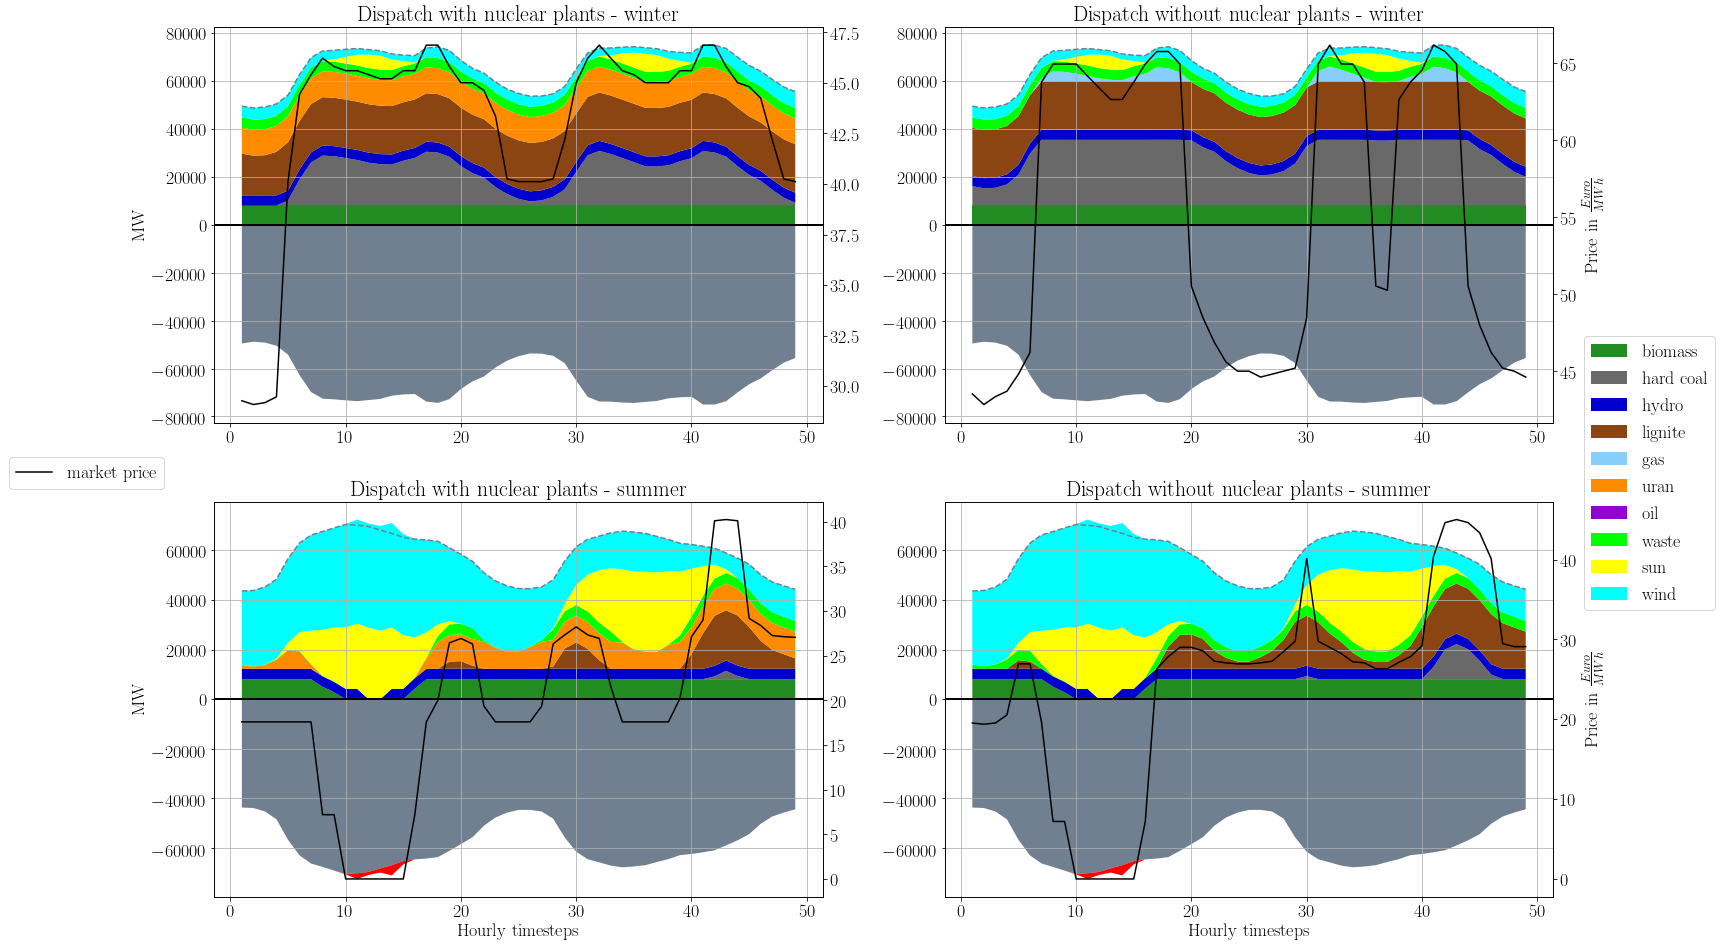

In [266]:
plot_energybalance_grid_all("dispatch")

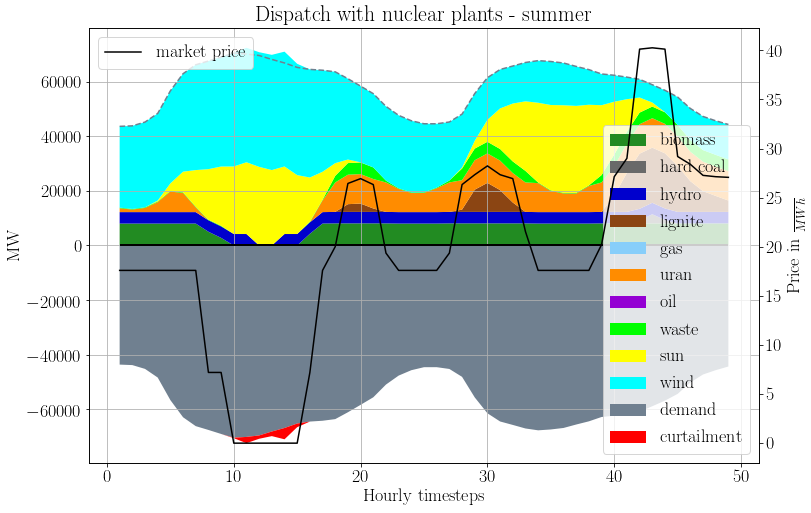

In [267]:
plot_energybalance_single("dispatch_nuclear", "summer")

## Distribution of generation

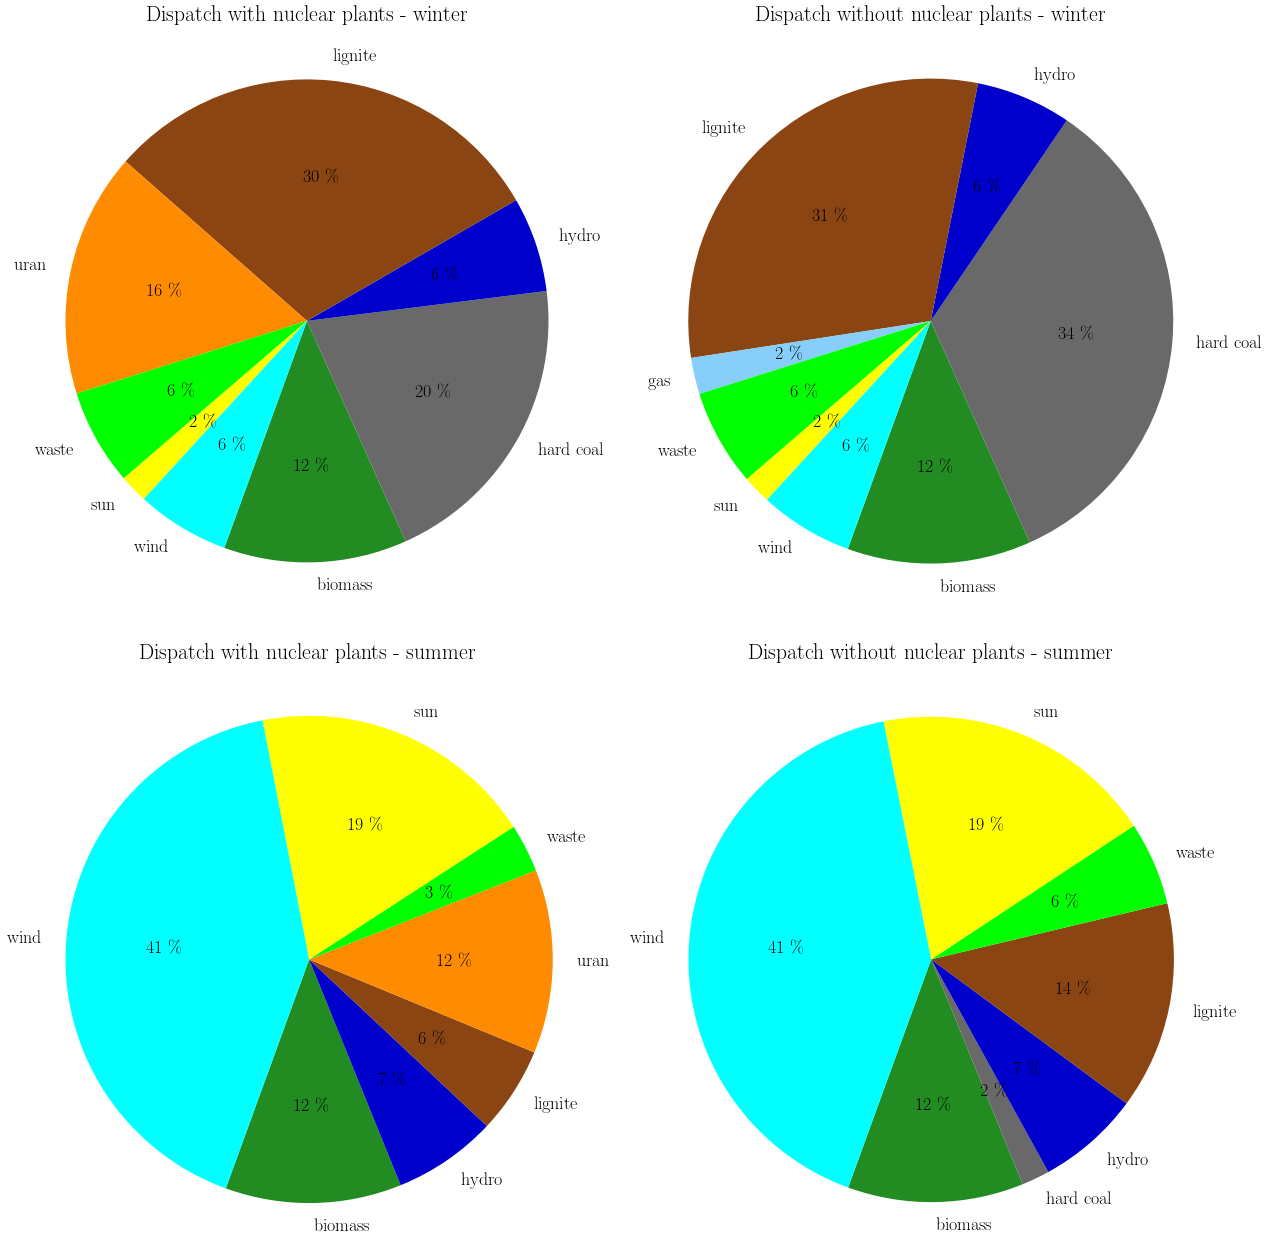

In [268]:
plot_distribution_generation_grid_all("dispatch")

# DC Load Flow

## Energy Balance

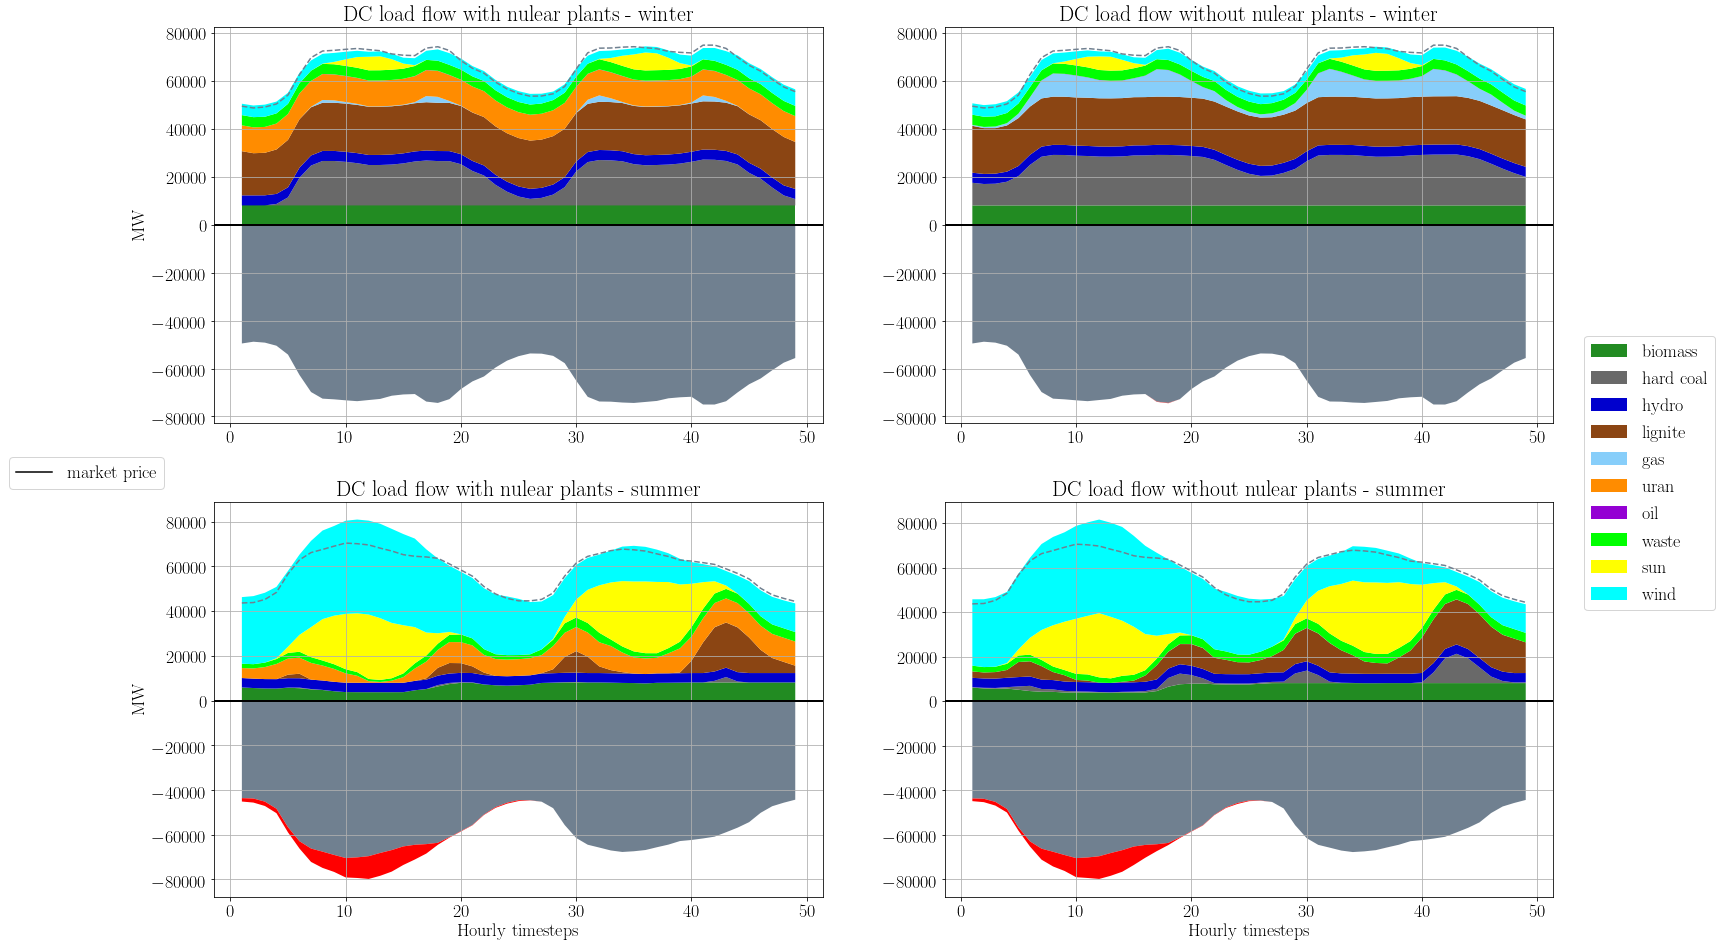

In [270]:
plot_energybalance_grid_all("dc_load_flow")

## Distribution of generation

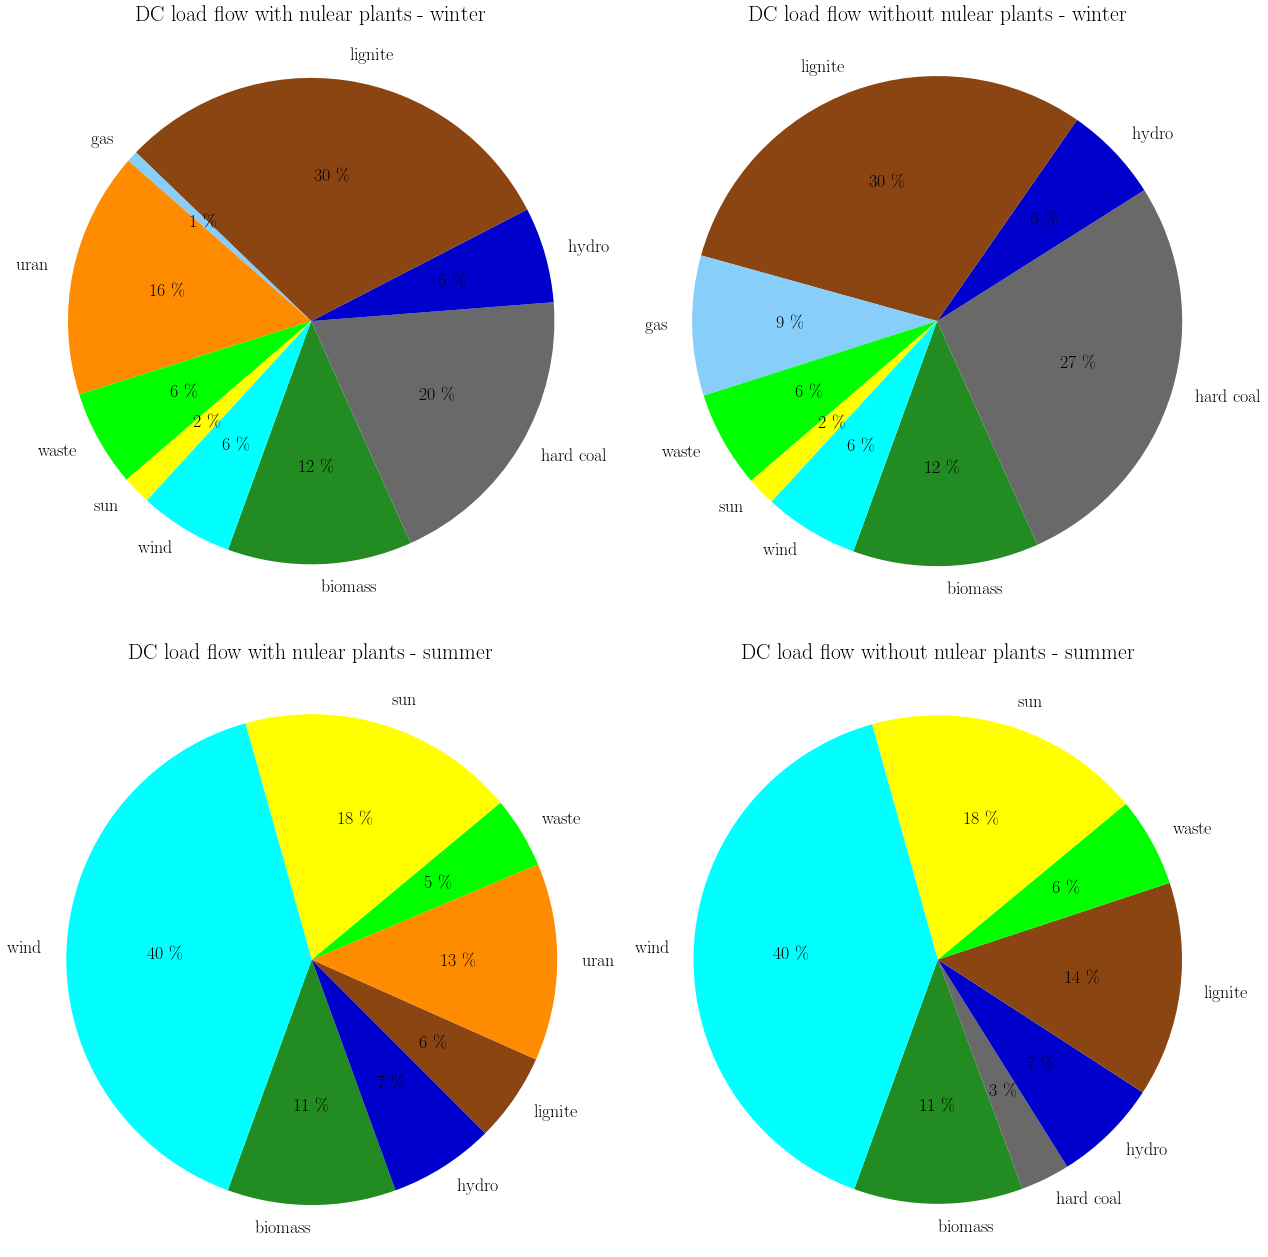

In [271]:
plot_distribution_generation_grid_all("dc_load_flow")

In [272]:
price = np.genfromtxt("export_files/price_array.csv", delimiter=',')
price2 = pd.read_csv("export_files/dc_load_flow_nuclear/2_summer_price.csv")

In [11]:
price

array([[27.06525453, 27.06525453, 27.06525453, ..., 27.06525453,
        27.06525453, 27.06525453],
       [28.23074125, 28.39406619, 28.56184544, ..., 27.26642561,
        27.19855412, 27.26642561],
       [28.23074125, 28.39406619, 28.56184544, ..., 27.26642561,
        27.19855412, 27.26642561],
       ...,
       [28.23074125, 28.39406619, 28.56184544, ..., 27.26642561,
        27.19855412, 27.26642561],
       [28.23074125, 28.39406619, 28.56184544, ..., 27.26642561,
        27.19855412, 27.26642561],
       [28.23074125, 28.39406619, 28.56184544, ..., 27.26642561,
        27.19855412, 27.26642561]])

In [12]:
price2

,timestep,node,price
0,1,n3303,17.510368
1,2,n3303,17.510368
2,3,n3303,17.510368
3,4,n3303,17.510368
4,5,n3303,17.510368
...,...,...,...
28660,45,n8066,28.766712
28661,46,n8066,28.150694
28662,47,n8066,27.198554
28663,48,n8066,27.065255


In [13]:
NODES = price2.node.unique()

In [14]:
data = [[1,2,3],
        [10,20,30]
       ]
data

[[1, 2, 3], [10, 20, 30]]

<IPython.core.display.Javascript object>


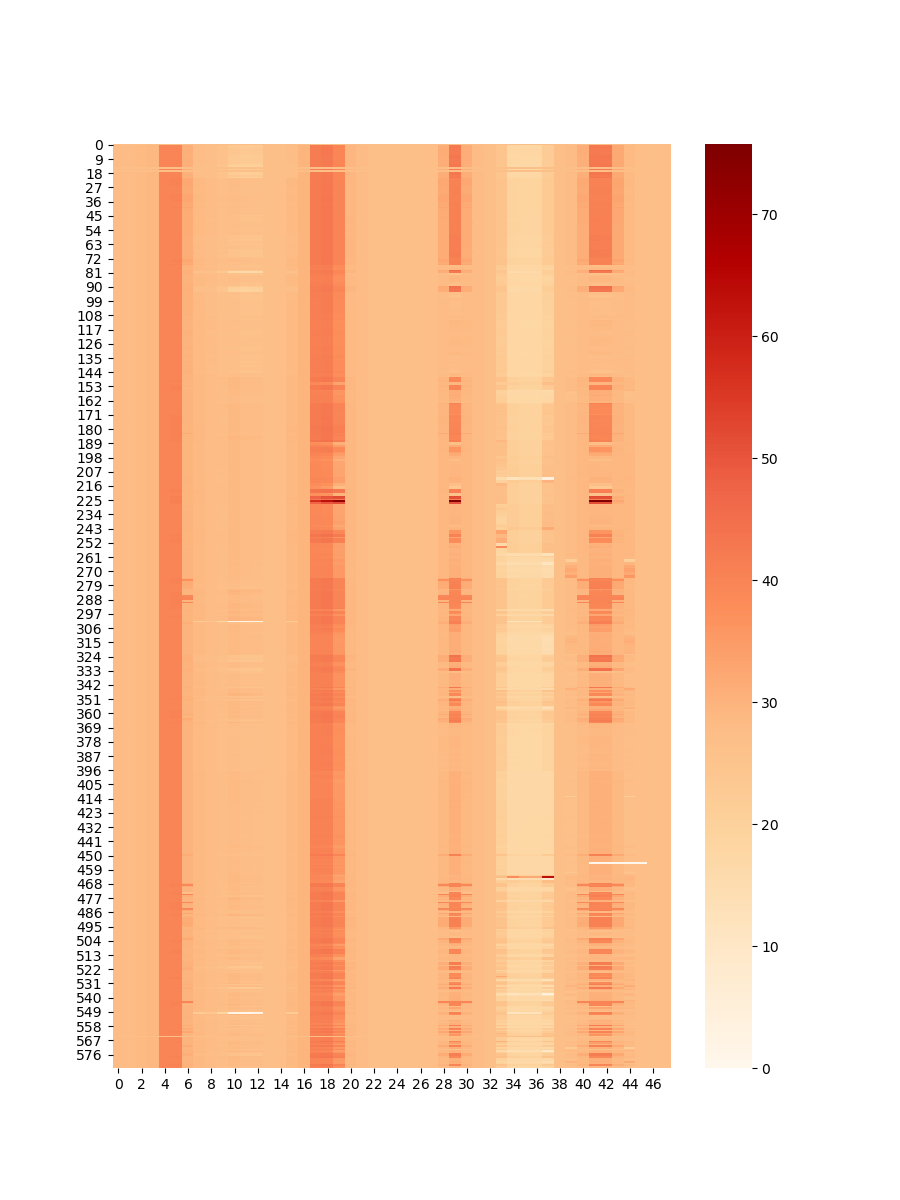

In [15]:
fig, ax = plt.subplots(figsize=(9,12))
heat_map = sb.heatmap(price, cmap="OrRd")

In [16]:
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

In [17]:
# price median